# *Artificial Intelligence (AI) PRACTICALS :-*

#### 6022 - Shibu Mohapatra

---
# **Practical 1 -** BFS, DFS & IDDFS
> - Implement Breadth first Search algorithm 
> - Implement Depth First Search Algorithm
> - Implement Iterative Deepening DFS Search
---

## `A. Breadth First Search`

### Description

* Uses FIFO, expands root node first, expands all nodes at level d before expanding level d+1.

* A breadth first search (BFS) explores nodes nearest the root before exploring nodes further away.

* After searching A, then B, then C it proceeds towards D, E, F and so on.

![](https://drive.google.com/uc?export=view&id=1kadHTK2zyTVki-5vM90BoT371d3Ynvvf)

### `◘ BFS Graph`

![](https://drive.google.com/uc?id=1-fYSGyuhfLDMKczlmr3-oQ-LgFzbjVt-)

In [ ]:
#bfs
graph_shibu = {
  'A' : ['B','C'],
  'B' : ['D', 'E'],
  'C' : ['F'],
  'D' : [],
  'E' : ['F'],
  'F' : []
}
visited = [] 
queue = []     

def bfs(visited, graph_shibu, node):
  visited.append(node)
  queue.append(node)
  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 
    for neighbour in graph_shibu[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
bfs(visited, graph_shibu, 'A')

print("\n----------")
print('\033[1m' + '6022 SHIBU')

A B C D E F 
----------
6022 SHIBU


## `B. Depth First Search`

### Description

* A depth first search (DFS) explores a path all the way to a leaf before backtracing & exploring another path.

* Always expands the deepest nodes in the current fringe. The search proceeds immediately to deepest level of search tree, where nodes have no successors.

* Uses LIFO queqe (stack)

![](https://drive.google.com/uc?export=view&id=1pcc-p0GzLNaEWWCItlsyZGxV9eqoOLp3)

### `◘ DFS Graph`

![](https://drive.google.com/uc?id=15eVDBqs733rJKzKWy2sv75fwX7lXffQA)

In [ ]:
#dfs

graph_shibu = {
    'A' : ['B','C'],
    'B' : ['D', 'E'],
    'C' : ['D'],
    'D' : ['E'],
    'E' : [],
}
visited = set()            
def dfs(visited, graph_shibu, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph_shibu[node]:
            dfs(visited, graph_shibu, neighbour)
dfs(visited, graph_shibu, 'A')

print("\n----------")
print('\033[1m' + '6022 SHIBU')

A
B
D
E
C

----------
6022 SHIBU


## `C. Iterative Deepening DFS Search`

### Description:

* IDDFS combines depth-first search’s space-efficiency and breadth-first search’s fast search (for nodes closer to root)

* Algorithm-

`1. First, perform a depth-first search to depth one.`
 
`2. Then, discarding the nodes generated in the first search, start over and do a depth-first search to level two.`

`3. Next, start over again and do a depth-first search to depth three, etc., continuing this process until a goal state is reached.`

![](https://drive.google.com/uc?export=view&id=1ZQtQoVHPtn0Ic1hmstOXS8K7BgywBWSY)

### `◘ IDDFS Graph`

![](https://drive.google.com/uc?id=12TZxv_ZS3_PjsrAN-sKOVi3-WwbNDPQ-)

In [ ]:
#Iterative Deepening Search DFS

graph_shibu = {
    '0': ['1'],
    '1': ['0', '2'],
    '2': ['3', '5', '7', '8'],
    '3': ['9', '10'],
    '5':['2', '6', '7', '8'],
    '6':['5'],
    '7':['2','5', '8'],
    '8':['2','5', '7'],
    '9':['3'],
    '10':['3'],  
}
def DLS(source,depth):
    start=graph_shibu[source]
    print(source, end=' ')
    if start[0] is None:
        return
    if depth==0:
        return
    else:
        for location in start:
            listt = location
            for place in listt:
                DLS(place,depth-1)

def iddfs(source,max_height):
    for i in range(max_height+1):
        print('depth: '+str(i)+': ',end=' ')
        DLS(source,i)
        print()

iddfs('0',4)

print("\n----------")
print('\033[1m' + '6022 SHIBU')

depth: 0:  0 
depth: 1:  0 1 
depth: 2:  0 1 0 2 
depth: 3:  0 1 0 1 2 3 5 7 8 
depth: 4:  0 1 0 1 0 2 2 3 9 1 0 5 2 6 7 8 7 2 5 8 8 2 5 7 

----------
6022 SHIBU


---
# **Practical 2 -** A* search & RBFS
> - Implement A* Heuristic search algorithm 
> - Implement Recurssive Best First Search
---

## `A* Hueristic Search`

### Description:

* A* Search algorithm is one of the best and popular technique used in path-finding and graph traversals.

*  A* working:
1. Node (also called State) — All potential position or stops with a unique identification

2. Transition — The act of moving between states or nodes.
Starting Node — Whereto start searching

3. Goal Node — The target to stop searching.
Search Space — A collection of nodes, like all board positions of a board game.

4. Cost — Numerical value (say distance, time, or financial expense) for the path from a node to another node.

5. g(n) — this represents the exact cost of the path from the starting node to any node n

6. h(n) — this represents the heuristic estimated cost from node n to the goal node.

7. f(n) — lowest cost in the neighboring node n

8. These values we calculate using the following formula: **f(n) = g(n) + h(n)**

![](https://drive.google.com/uc?export=view&id=1MDBpinYHa1diBkylWvpdpakHUOM0plfO)

### `◘ Coding part`

In [ ]:
from queue import PriorityQueue

class State(object):
    def __init__(self, value, parent, start = 0, goal = 0):
        self.children = []
        self.parent = parent
        self.value = value
        self.dist = 0
        if parent:
            self.start = parent.start
            self.goal = parent.goal
            self.path = parent.path[:]
            self.path.append(value)

        else:
            self.path = [value]
            self.start = start
            self.goal = goal

    def GetDistance(self):
        pass
    def CreateChildren(self):
        pass

class State_String(State):
    def __init__(self, value, parent, start = 0, goal = 0 ):
        super(State_String, self).__init__(value, parent, start, goal)
        self.dist = self.GetDistance()

    def GetDistance(self):
            if self.value == self.goal:
                return 0
            dist = 0
            for i in range(len(self.goal)):
                letter = self.goal[i]
                dist += abs(i - self.value.index(letter))
            return dist

    def CreateChildren(self):
            if not self.children:
                for i in range(len(self.goal)-1):
                    val = self.value
                    val = val[:i] + val[i+1] + val[i] + val[i+2:]
                    child = State_String(val, self)
                    self.children.append(child)

class a_star:
    def __init__(self, start, goal):
        self.path = []
        self.vistedQueue =[]
        self.priorityQueue = PriorityQueue()
        self.start = start
        self.goal = goal

    def Solve(self):
        startState = State_String(self.start,0,self.start,self.goal)
        count = 0
        self.priorityQueue.put((0,count, startState))
        while(not self.path and self.priorityQueue.qsize()):
               closesetChild = self.priorityQueue.get()[2]
               closesetChild.CreateChildren()
               self.vistedQueue.append(closesetChild.value)
               for child in closesetChild.children:
                   if child.value not in self.vistedQueue:
                    count += 1
                    if not child.dist:
                       self.path = child.path
                       break
                    self.priorityQueue.put((child.dist,count,child))
        if not self.path:
            print("Goal Of  is not possible !" + self.goal )
        return self.path

if __name__ == "__main__":
    start1 = "hbuis"
    goal1 = "shibu"
    #print("Starting....")
    a = a_star(start1,goal1)
    a.Solve()
    for i in range(len(a.path)):
        print("->",i,a.path[i])

print("\n----------")
print('\033[1m' + '6022 SHIBU')

-> 0 hbuis
-> 1 hbius
-> 2 hbisu
-> 3 hibsu
-> 4 hisbu
-> 5 hsibu
-> 6 shibu

----------
6022 SHIBU


## `B. Recursive best-first search algorithm`

### Description:

* Recursive Best-First Search or RBFS, is an AI algo that belongs to heuristic search algorithm.

* RBFS is similar to a recursive implementation of depth-first search, with the difference that it uses a special condition for backtracking that ensures that nodes are expanded in best-first order. 

* It works by maintaing on the recursion stack the complete path to the current node being expanded, as well as all immediate siblings of nodes on that path, along with cost of the best node in the subtree explored below each sibling.

* Whenever the cost of the current node exceeds that of some other node in the previously expanded portion of the tree, the algorithm backs up to their deepest common ancestor, and continues the search down the new path.

**Example can be given using Romanian map:**

![](https://drive.google.com/uc?export=view&id=1SNQsAzA2uwWWQ1hwW-6q8ui46hBZWOy_)
![](https://drive.google.com/uc?export=view&id=13Ro6qHx8wA8t5m-vX15WYzaqYTdI3CLa)
![](https://drive.google.com/uc?export=view&id=1CKLJ8QUyXRl2-LVrlLrEObqvtqf2Ynne)

In [ ]:
'''def RBFS( Root, Goal,  limit):
     if(Root==Goal):
          goalSucc=true
          return Root.fCost
     else:
         successors=ExpandNode(Root)
         successors.SortNodes()   
         if(successors[firstNode].fCost>limit):
              return successors[firstNode].fCost
         else:
              closeList.Insert(Root)
              if s in successors:
                   if(s!=closeList[item]):
                        openList.Insert(s)
                        openList.Sort()
     bestNode=openList.RemoveFirstNode();
     alternativeNode=openList.RemoveFirstNode();

     while(goalSucc==false):
          bestNode=RBFS(bestNode,Goal,Math.Min(limit, alternativeNode.fCost))
          openList.Insert(bestNode)
          list.Sort( )
          bestNode=openList.RemoveFirstNode()
          alternativeNode=openList.RemoveFirstNode()

RBFS(2,5,3)'''

print("Shibu")

Shibu


---
# **Practical 3 -** IRIS Dataset
> - Implementation of Neural Network on IRIS dataset
---

### Description:

* Iris Data Set, this small dataset often used for testing out ML algo & visualizations (eg: Scatter Plot). 

* Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.

* The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

* One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

1. Class:
   > Iris Setosa

   > Iris Versicolour

   > Iris Virginica

![](https://drive.google.com/uc?export=view&id=1NLFhihRkVg09OJbxwsop4i0H8humaAf0)

#### `◘ Packages`

In [ ]:
import numpy as np
import pandas as pd

#### `◘ Uploading the dataset`

In [ ]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/iris.csv")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### `◘ Finding the missing values`

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:

'''df.species[df.species=="setosa"]=0
df.species[df.species=="versicolor"]=1
df.species[df.species=="virginica"]=2'''

'df.species[df.species=="setosa"]=0\ndf.species[df.species=="versicolor"]=1\ndf.species[df.species=="virginica"]=2'

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df=pd.get_dummies(df,columns=["species"])

In [ ]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [ ]:
df.shape

(150, 7)

In [ ]:
attri=df.drop(["species_setosa","species_versicolor","species_virginica"],axis=1)
clas=df.drop(["sepal_length","sepal_width","petal_length","petal_width"],axis=1)

In [ ]:
from sklearn import preprocessing

In [ ]:
normalized_attri = preprocessing.normalize(attri)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
attri_train,attri_val,clas_train,clas_val=train_test_split(normalized_attri,clas,test_size=0.15,random_state=42)
attri_train,attri_test,clas_train,clas_test=train_test_split(attri_train,clas_train,test_size=0.15,random_state=42)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
#from keras.layers.normalization import BatchNormalization 
#from keras.utils import np_utils

#### `◘ Applying multi-layer neural netwrok model`

In [ ]:
def Neural_Network():
    model=Sequential()
    #input layer
    model.add(Dense(8,input_dim=4))
    model.add(Activation('relu'))
    
    #1st hidden layer
    model.add(Dense(16))
    model.add(Activation('relu'))
    
    #2nd hidden layer
    model.add(Dense(32))
    model.add(Activation('relu'))
    
    #Output layer
    #model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('sigmoid'))
    return model


In [ ]:
model=Neural_Network()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 40        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

In [ ]:
from keras import optimizers

In [ ]:
#opt = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.0001/100, amsgrad=False, clipnorm = 1.)

In [ ]:
model.fit(attri_train,clas_train,validation_data=(attri_val,clas_val),batch_size=32,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 35ms/step - loss: 1.1050 - accuracy: 0.3458 - val_loss: 1.1082 - val_accuracy: 0.2609
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1027 - accuracy: 0.3458 - val_loss: 1.1057 - val_accuracy: 0.2609
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1002 - accuracy: 0.3458 - val_loss: 1.1047 - val_accuracy: 0.2609
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0997 - accuracy: 0.3458 - val_loss: 1.1040 - val_accuracy: 0.2609
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0983 - accuracy: 0.3458 - val_loss: 1.1033 - val_accuracy: 0.2609
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0974 - accuracy: 0.3458 - val_loss: 1.1021 - val_accuracy: 0.2609
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0965 - accuracy: 0.3458 - val_loss: 1.1005 - val_accuracy: 0.2609
Epoch 8/100
4/4 [=========

In [ ]:
loss,accuracy=model.evaluate(x=attri_test,y=clas_test,batch_size=32)

1/1 [==============================] - 0s 1ms/step - loss: 0.2100 - accuracy: 0.9500


In [ ]:
print(accuracy*100)

94.9999988079071


In [ ]:
loss

0.21001720428466797

In [ ]:
print("\n----------")
print('\033[1m' + '6022 SHIBU')


----------
6022 SHIBU


---
# **Practical 4 -** Diabetes Dataset
> - Implementation of basic neural network model with 4 activation functions on Pima Indians onset of diabetes dataset.
---

### Description:

* This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

* The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. 

* In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

*   The steps to use keras are as follows:

1.   Load Data.
2.   Define Keras Model.
3.   Compile Keras Model.
4.   Fit Keras Model.
5.   Evaluate Keras Model.
6.   Tie It All Together.
7.   Make Predictions


#### `◘ Uploading csv file`

In [ ]:
from google.colab import files
files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


{'pima-indians-diabetes.csv': b'6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31.0,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0.0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38.0,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30.0,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29.0,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43,1\r\n1,97,66,15,140,23.2,0.487,22,0\r\n13,145,82,19,110,22.2,0.245,57,0\r\n5

#### `◘ Actual algorithm`

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# loading the dataset
dataset = loadtxt('/content/drive/My Drive/Colab Notebooks/pima-indians-diabetes.csv', delimiter=',')

# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# defining the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=170, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/170
77/77 [==============================] - 0s 901us/step - loss: 3.5934 - accuracy: 0.5104
Epoch 2/170
77/77 [==============================] - 0s 911us/step - loss: 2.2045 - accuracy: 0.5417
Epoch 3/170
77/77 [==============================] - 0s 1ms/step - loss: 1.3076 - accuracy: 0.6042
Epoch 4/170
77/77 [==============================] - 0s 998us/step - loss: 1.0232 - accuracy: 0.5755
Epoch 5/170
77/77 [==============================] - 0s 926us/step - loss: 0.9515 - accuracy: 0.5872
Epoch 6/170
77/77 [==============================] - 0s 881us/step - loss: 0.8803 - accuracy: 0.5872
Epoch 7/170
77/77 [==============================] - 0s 992us/step - loss: 0.8064 - accuracy: 0.6120
Epoch 8/170
77/77 [==============================] - 0s 901us/step - loss: 0.7585 - accuracy: 0.6237
Epoch 9/170
77/77 [==============================] - 0s 959us/step - loss: 0.7367 - accuracy: 0.6445
Epoch 10/170
77/77 [==============================] - 0s 925us/step - loss: 0.7187 - accuracy

In [ ]:
print('Accuracy: %.2f' % (accuracy*100))

print("\n----------")
print('\033[1m' + '6022 SHIBU')

Accuracy: 70.31

----------
6022 SHIBU


---
# **Practical 5 -** AND & OR in NN
> - Performing AND & OR Operations in the Neural Network.
---

---
#### **Perceptron:**

1.   A Perceptron is an algorithm used for supervised learning of binary classifiers. 

2.   In other words, perceptron is a single-layer neural network. 

3. They consist of four main parts including input values, weights and bias, net sum, and an activation function.

---

#### **Working:-**

1.   The process begins by taking all the input values and multiplying them by their weights. 

2. Then, all of these multiplied values are added together to create the weighted sum. The weighted sum is then applied to the activation function, producing the perceptron's output. 

3. The activation function plays the integral role of ensuring the output is mapped between required values such as (0,1) or (-1,1). 

4. It is important to note that the weight of an input is indicative of the strength of a node. 

5. Similarly, an input's bias value gives the ability to shift the activation function curve up or down.

###### **Diagram:**

![](https://drive.google.com/uc?id=1Ynm9XYWMH-Vy6kuWuhV-rO3fmKq9gO6W)

---



#### `◘ Packages & Implementation`

In [ ]:
import numpy as np

#Defining unit step function
#Heavyside Step function. v must be a scalar
def unitStep(v):
  if v >= 0:
    return 1
  else:
    return 0

#Function implemented by a perceptron with weight vector w and bias b
#Designing Perceptron Model
def perceptronModel(x, w, b):
  v = np.dot(w, x) + b
  y = unitStep(v)
  return y

#Testing th perceptron Model
test1 = np.array([0, 0])
test2 = np.array([0, 1])
test3 = np.array([1, 0])
test4 = np.array([1, 1])

#OR Logic Function
def OR_logicFunction(x):
  w = np.array([1, 1])           #w1 = 1, w2 = 1, b = -0.5
  b = -0.5
  return perceptronModel(x, w, b)

#AND Logic Function
def AND_logicFunction(x):           #ŷ = ϴ(w1x1 + w2x2 + b)
  w = np.array([1, 1])              #w1 = 1, w2 = 1, b = -1.5
  b = -1.5
  return perceptronModel(x, w, b)       

#NOT Logic Function
def NOT_logicFunction(x):                   #ŷ = ϴ(wx + b)
	return perceptronModel(x, w=-1, b=0.5)    #w = -1 and b = 0.5.

#XOR Logic Function         
def XOR_logicFunction(x):                 #2 NOT Gates, 2 AND Gates, 1 OR Gate       
    g1 = AND_logicFunction(x)             #XOR(X1, X2) = AND(NOT(AND(x1, x2)), OR(x1, x2))
    g2 = NOT_logicFunction(g1)
    g3 = OR_logicFunction(x)
    new_x = np.array([g2, g3])
    output = AND_logicFunction(new_x)
    return output

print("OR({}, {}) = {}".format(0, 0, OR_logicFunction(test1)))
print("OR({}, {}) = {}".format(0, 1, OR_logicFunction(test2)))
print("OR({}, {}) = {}".format(1, 0, OR_logicFunction(test3)))
print("OR({}, {}) = {}".format(1, 1, OR_logicFunction(test4)))

print("--------")

print("AND({}, {}) = {}".format(0, 0, AND_logicFunction(test1)))
print("AND({}, {}) = {}".format(0, 1, AND_logicFunction(test2)))
print("AND({}, {}) = {}".format(1, 0, AND_logicFunction(test3)))
print("AND({}, {}) = {}".format(1, 1, AND_logicFunction(test4)))

print("--------")

print("NOT(0) = {}".format(NOT_logicFunction(0)))
print("NOT(1) = {}".format(NOT_logicFunction(1)))

print("----------")

print("XOR({}, {}) = {}".format(0, 0, XOR_logicFunction(test1)))
print("XOR({}, {}) = {}".format(0, 1, XOR_logicFunction(test2)))
print("XOR({}, {}) = {}".format(1, 0, XOR_logicFunction(test3)))
print("XOR({}, {}) = {}".format(1, 1, XOR_logicFunction(test4)))

print("\n----------")
print('\033[1m' + '6022 SHIBU')

OR(0, 0) = 0
OR(0, 1) = 1
OR(1, 0) = 1
OR(1, 1) = 1
--------
AND(0, 0) = 0
AND(0, 1) = 0
AND(1, 0) = 0
AND(1, 1) = 1
--------
NOT(0) = 1
NOT(1) = 0
----------
XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0

----------
6022 SHIBU


---
# **Practical 6** - Cat vs NonCat
> - Prediction Algorithm - Use of different packages on dataset of Cat and Non-Cat images.
---

### Description:

* Data will be loaded from the test_catvnoncat.h5 and train_catvnoncat.h5 files

  The load_dataset function below is responsebile for loading the above mentioned data files.
lr_utils file includes the function load_dataset()

* Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

 We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. 
 
 After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).
 
 Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. 
 
* Feel free also to change the `index` value and re-run to see other images. 

  Example of a picture change the index value below to check if the image at that particular index is cat or non cat

**Note: For the first image(flower) index = 30 & for the second image (Cat image) index = 24**

### `◘ Coding and implementation`

y = [0], it's a non-cat picture


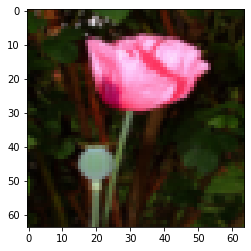

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

def load_dataset():
    train_dataset = h5py.File('/content/drive/My Drive/Colab Notebooks/datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/My Drive/Colab Notebooks/datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Loading the data (non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
index = 30
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  " picture")

y = [1], it's a cat picture


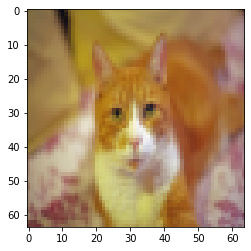

In [ ]:
# Loading the data (cat)
train_set_y_orig, train_set_x, test_set_y_orig, test_set_x, classes = load_dataset()
index = 24
plt.imshow(train_set_y_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  " picture")

In [ ]:
print("----------")
print('\033[1m' + '6022 SHIBU')

----------
6022 SHIBU


---
# **Practical 8 -** Simple Linear Regression
---



## Description:

* Linear Regression is a machine learning algorithm based on supervised learning. 

* It performs a regression task. Regression models a target prediction value based on independent variables. 

* It is mostly used for finding out the relationship between variables and forecasting. 

* Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

![](https://drive.google.com/uc?export=view&id=1e85UJ4UxaVLQfl-LLfABEU0Mghb-6RGI)

#### `◘ Packages`

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
x_and_y = [(0,1),(1,3),(2,2),(3,5),(4,7),(5,8),(6,8),(7,9),(8,10),(9,12)]
data = pd.DataFrame(x_and_y, columns=['X','y'])
data

,X,y
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7
5,5,8
6,6,8
7,7,9
8,8,10
9,9,12


#### `◘ Plotting`

1.525


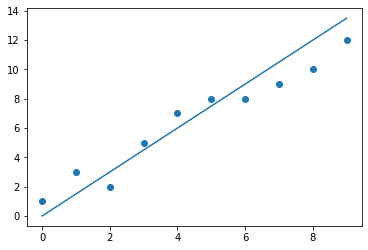

In [ ]:
X = data['X']
y = data['y']
b = 0
w = 1.5

y_predicted = b + w * X
error = y - y_predicted
print(np.mean(error**2))
plt.scatter(X,y)
plt.plot(X, y_predicted)

In [ ]:
print("\n----------")
print('\033[1m' + '6022 SHIBU')


----------
6022 SHIBU


---
# **Practical 9 -** Support Vector Algorithm

>- Implement Support Vector Algorithm
---


### Description:

* Itis a supervised machine learning algorithm which can be used for both classification or regression challenges. 

* However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. 

* Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

![](https://drive.google.com/uc?id=1qsbhpArP9qBIsAa-JEJImF1eU0uWrKUp)


### `◘ Coding and implementation`

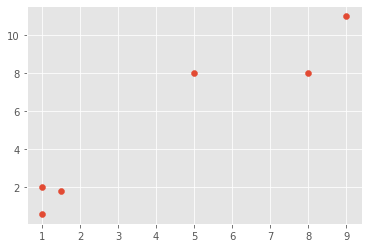

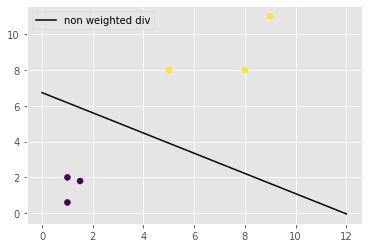


----------
6022 SHIBU


In [ ]:
# Support Vector Algorithm

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]
plt.scatter(x,y)
plt.show()
X = np.array([[1, 2],
             [5, 8],
             [1.5, 1.8],
             [8,8],
             [1, 0.6],
             [9, 11]])
y = np.array([0, 1, 0, 1, 0, 1])

clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)
w = clf.coef_[0]

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx -clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

print("\n----------")
print('\033[1m' + '6022 SHIBU')

---
# **Practical 10 -** Decision Tree Learning

>- Implement Decision Tree Learning Algorithm
---

### Description:

* Decision Tree Analysis is a general, predictive modelling tool that has applications spanning a number of different areas. In general, decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions.

* The terminologies are:

1. Instances: Refer to the vector of features or attributes that define the input space

2. Attribute: A quantity describing an instance

3. Concept: The function that maps input to output

4. Target Concept: The function that we are trying to find, i.e., the actual answer

5. Hypothesis Class: Set of all the possible functions

6. Sample: A set of inputs paired with a label, which is the correct output (also known as the Training Set)

7. Candidate Concept: A concept which we think is the target concept

8. Testing Set: Similar to the training set and is used to test the candidate concept and determine its performance

* A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

* Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from that node corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new nodes.

![](https://drive.google.com/uc?id=1UNRf6ZgnheoyfK0PhU1oQ32ppynDBPSp)

    Fig 1. A decision tree for the concept Play Badminton

![](https://drive.google.com/uc?id=1iJ64QAYkjcYKmPgKhcYGPBbJDdmzR8nl)


    Fig 2. A decision tree for the concept Play Badminton (when attributes are continuous)




### `◘ Coding part`

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Following are the columns of iris dataset

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 column

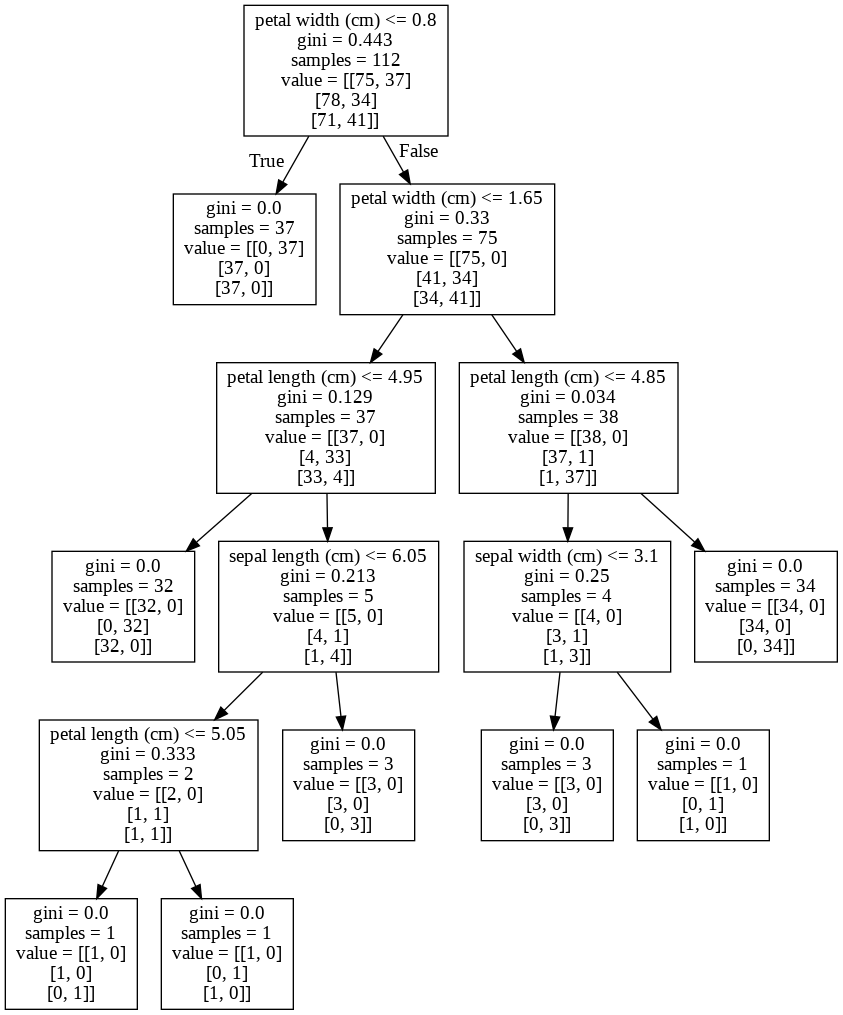

In [ ]:
# Here we have taken a decision tree for Iris Dataset

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
print("Following are the columns of iris dataset\n")
print(X)
print("\n\n")
y = pd.Categorical.from_codes(iris.target, iris.target_names)

X.head()
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
print("\n----------")
print('\033[1m' + '6022 SHIBU')


----------
6022 SHIBU


# **Miscellaneous**

* Basically a second code for cats vs non-cats dataset

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-09-11 02:30:38--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.215.128, 108.177.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   156MB/s    in 0.4s    

2020-09-11 02:30:38 (156 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
                                    
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 60s - loss: 0.7886 - accuracy: 0.5705 - val_loss: 0.6656 - val_accuracy: 0.6690
Epoch 2/15
100/100 - 59s - loss: 0.6327 - accuracy: 0.6630 - val_loss: 0.5977 - val_accuracy: 0.6660
Epoch 3/15
100/100 - 58s - loss: 0.5621 - accuracy: 0.7225 - val_loss: 0.6157 - val_accuracy: 0.6650
Epoch 4/15
100/100 - 58s - loss: 0.4827 - accuracy: 0.7710 - val_loss: 0.5735 - val_accuracy: 0.7190
Epoch 5/15
100/100 - 58s - loss: 0.4032 - accuracy: 0.8240 - val_loss: 0.7687 - val_accuracy: 0.6650
Epoch 6/15
100/100 - 60s - loss: 0.3166 - accuracy: 0.8695 - val_loss: 0.7786 - val_accuracy: 0.6760
Epoch 7/15
100/100 - 62s - loss: 0.2330 - accuracy: 0.8980 - val_loss: 0.7453 - val_accuracy: 0.7140
Epoch 8/15
100/100 - 59s - loss: 0.1693 - accuracy: 0.9370 - val_loss: 0.8597 - val_accuracy: 0.7250
Epoch 9/15
100/100 - 59s - loss: 0.1216 - accuracy: 0.9585 - val_loss: 0.9997 - val_accuracy: 0.6930
Epoch 10/15
100/100 - 59s - loss: 0.0772 - accuracy: 0.9680 - val_loss: 1.2988 - val_accura

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a non cat")
    
  else:
    print(fn + " is a cat")
 

Saving cat.2.jpg to cat.2.jpg
Saving cat.3.jpg to cat.3.jpg
Saving cat.4.jpg to cat.4.jpg
Saving dog.2.jpg to dog.2.jpg
Saving dog.4.jpg to dog.4.jpg
Saving dog.12.jpg to dog.12.jpg
[0.]
cat.2.jpg is a cat
[0.]
cat.3.jpg is a cat
[0.]
cat.4.jpg is a cat
[1.]
dog.2.jpg is a non cat
[1.]
dog.4.jpg is a non cat
[1.]
dog.12.jpg is a non cat


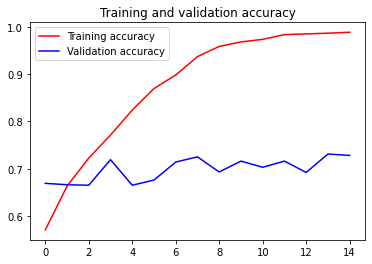

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
loss

[0.7885891795158386,
 0.6327358484268188,
 0.5621000528335571,
 0.48274996876716614,
 0.4031623899936676,
 0.3165750801563263,
 0.2329723834991455,
 0.169291153550148,
 0.12163351476192474,
 0.07722964882850647,
 0.07543396204710007,
 0.0676269605755806,
 0.04645036906003952,
 0.046941254287958145,
 0.08216558396816254]